# <font color="dark blue"><strong>Note - This File Is In Step By Step Process As Per The Problem Statement - </strong></font>

### <font color="dark blue"><strong>Part (1) - Data Preparation.
### <font color="dark blue"><strong>Part (2) - Data Preprocessing With Visualizations (EDA) - ( Extra Visualisations Also Done With Libararies ).
### <font color="dark blue"><strong>Part (3) - Taining And Prediction Of The Models.</strong></font>

# <font color="Green"><strong>Part (1) - Data Preparation.</strong></font>

In [1]:
# Importing Labrary.
import numpy as np
import pandas as pd

In [2]:
# Importing CSV File from Local System.
rain = pd.read_csv(r"C:\Users\moham\Internshala Interview Project\sydney_rain prediction.csv")

In [3]:
# Checking Data-Frames Info and found some missing values.
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          3337 non-null   object 
 1   Location      3337 non-null   object 
 2   MinTemp       3334 non-null   float64
 3   MaxTemp       3335 non-null   float64
 4   Rainfall      3331 non-null   float64
 5   Evaporation   3286 non-null   float64
 6   Sunshine      3321 non-null   float64
 7   Humidity9am   3323 non-null   float64
 8   Humidity3pm   3324 non-null   float64
 9   Pressure9am   3317 non-null   float64
 10  Pressure3pm   3318 non-null   float64
 11  Cloud9am      2771 non-null   float64
 12  Cloud3pm      2776 non-null   float64
 13  Temp9am       3333 non-null   float64
 14  Temp3pm       3333 non-null   float64
 15  RainToday     3331 non-null   object 
 16  RainTomorrow  3337 non-null   object 
dtypes: float64(13), object(4)
memory usage: 443.3+ KB


In [4]:
# Checking the null values before Imputation process.
rain.isnull().sum()

Date              0
Location          0
MinTemp           3
MaxTemp           2
Rainfall          6
Evaporation      51
Sunshine         16
Humidity9am      14
Humidity3pm      13
Pressure9am      20
Pressure3pm      19
Cloud9am        566
Cloud3pm        561
Temp9am           4
Temp3pm           4
RainToday         6
RainTomorrow      0
dtype: int64

In [5]:
# Deleting extra Dates And String values columns.
rain = rain.drop(columns=['Date','Location'])

In [6]:
# Filling Missing values with unknown string value in rain Data-Frame.
rain['RainToday'].fillna('Unknown', inplace=True)

In [7]:
# Importing Labrary.
from sklearn.preprocessing import LabelEncoder

# Performing Label Encoder to Convert string Values to Numbers.
label_encoder = LabelEncoder()
rain['RainToday'] = label_encoder.fit_transform(rain['RainToday'])
rain['RainTomorrow'] = label_encoder.fit_transform(rain['RainTomorrow'])

In [8]:
# Filling Missing values with mean values in rain Data-Frame.
numeric_columns = rain.select_dtypes(include='number').columns

# Looping through all the column 
for column in numeric_columns:
    rain[column] = rain[column].fillna(rain[column].mean())

In [9]:
rain.isnull().sum()

MinTemp         0
MaxTemp         0
Rainfall        0
Evaporation     0
Sunshine        0
Humidity9am     0
Humidity3pm     0
Pressure9am     0
Pressure3pm     0
Cloud9am        0
Cloud3pm        0
Temp9am         0
Temp3pm         0
RainToday       0
RainTomorrow    0
dtype: int64

In [10]:
#Finding duplicates.
rain[rain.duplicated()].head(5)

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


In [11]:
# Checking Data-Frames Info.
rain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3337 entries, 0 to 3336
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MinTemp       3337 non-null   float64
 1   MaxTemp       3337 non-null   float64
 2   Rainfall      3337 non-null   float64
 3   Evaporation   3337 non-null   float64
 4   Sunshine      3337 non-null   float64
 5   Humidity9am   3337 non-null   float64
 6   Humidity3pm   3337 non-null   float64
 7   Pressure9am   3337 non-null   float64
 8   Pressure3pm   3337 non-null   float64
 9   Cloud9am      3337 non-null   float64
 10  Cloud3pm      3337 non-null   float64
 11  Temp9am       3337 non-null   float64
 12  Temp3pm       3337 non-null   float64
 13  RainToday     3337 non-null   int32  
 14  RainTomorrow  3337 non-null   int32  
dtypes: float64(13), int32(2)
memory usage: 365.1 KB


In [12]:
# Checking Data-Frames.
rain

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,19.5,22.4,15.6,6.200000,0.0,92.0,84.0,1017.6,1017.4,8.0,8.0,20.7,20.9,2,1
1,19.5,25.6,6.0,3.400000,2.7,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,2,1
2,21.6,24.5,6.6,2.400000,0.1,88.0,86.0,1016.7,1015.6,7.0,8.0,23.5,23.0,2,1
3,20.2,22.8,18.8,2.200000,0.0,83.0,90.0,1014.2,1011.8,8.0,8.0,21.4,20.9,2,1
4,19.7,25.7,77.4,5.187432,0.0,88.0,74.0,1008.3,1004.8,8.0,8.0,22.5,25.5,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3332,8.6,19.6,0.0,2.000000,7.8,73.0,52.0,1025.9,1025.3,2.0,2.0,10.5,17.9,0,0
3333,9.3,19.2,0.0,2.000000,9.2,78.0,53.0,1028.5,1024.6,2.0,2.0,11.0,18.7,0,0
3334,9.4,17.7,0.0,2.400000,2.7,85.0,56.0,1020.8,1015.0,6.0,6.0,10.2,17.3,0,0
3335,10.1,19.3,0.0,1.400000,9.3,56.0,35.0,1017.3,1015.1,5.0,2.0,12.4,19.0,0,0


In [13]:
# Performing EDD to check the Dataframe.
rain.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000,3337.000000
mean,14.865057,23.002339,3.330231,5.187432,7.179374,68.229010,54.699158,1018.346156,1016.018774,4.181523,4.218660,17.819742,21.533333,0.520827,0.259215
std,4.551593,4.493290,9.886270,2.756095,3.801737,15.053668,16.261752,7.000492,7.012157,2.505491,2.409531,4.894240,4.301156,0.876827,0.438269
min,4.300000,11.700000,0.000000,0.000000,0.000000,19.000000,10.000000,986.700000,989.800000,0.000000,0.000000,6.400000,10.200000,0.000000,0.000000
25%,11.000000,19.600000,0.000000,3.200000,4.300000,58.000000,44.000000,1013.800000,1011.300000,2.000000,2.000000,13.800000,18.400000,0.000000,0.000000
50%,14.900000,22.800000,0.000000,4.800000,8.200000,69.000000,56.000000,1018.500000,1016.300000,4.181523,4.218660,18.200000,21.300000,0.000000,0.000000
75%,18.700000,26.000000,1.400000,7.000000,10.200000,80.000000,64.000000,1023.100000,1020.800000,7.000000,7.000000,21.700000,24.500000,2.000000,1.000000
max,27.600000,45.800000,119.400000,18.400000,13.600000,100.000000,99.000000,1039.000000,1036.700000,9.000000,8.000000,36.500000,44.700000,2.000000,1.000000


In [14]:
# Checking the Correlation values.
rain.corr()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
MinTemp,1.000000,0.770701,0.012866,0.567623,-0.062959,0.052362,0.270944,-0.393024,-0.355764,0.236288,0.163519,0.938814,0.752410,0.019052,0.079962
MaxTemp,0.770701,1.000000,-0.139837,0.509060,0.325107,-0.186875,-0.152310,-0.388533,-0.424653,-0.087381,-0.099167,0.858986,0.960026,-0.186998,-0.149269
Rainfall,0.012866,-0.139837,1.000000,-0.100468,-0.306119,0.330469,0.301337,-0.036988,0.003210,0.242049,0.200732,-0.055974,-0.143491,0.555041,0.293808
Evaporation,0.567623,0.509060,-0.100468,1.000000,0.174467,-0.394166,-0.101849,-0.345700,-0.300285,-0.037598,-0.037739,0.605348,0.473879,-0.227974,-0.064301
Sunshine,-0.062959,0.325107,-0.306119,0.174467,1.000000,-0.489019,-0.582792,-0.046391,-0.094322,-0.660555,-0.676397,0.114663,0.343563,-0.365386,-0.521637
Humidity9am,0.052362,-0.186875,0.330469,-0.394166,-0.489019,1.000000,0.658120,0.263146,0.251304,0.423560,0.331734,-0.147977,-0.157149,0.398569,0.329011
Humidity3pm,0.270944,-0.152310,0.301337,-0.101849,-0.582792,0.658120,1.000000,0.154352,0.183056,0.453697,0.471684,0.128479,-0.213727,0.341686,0.471250
Pressure9am,-0.393024,-0.388533,-0.036988,-0.345700,-0.046391,0.263146,0.154352,1.000000,0.960460,-0.011072,-0.040115,-0.418943,-0.345926,-0.000581,-0.032465
Pressure3pm,-0.355764,-0.424653,0.003210,-0.300285,-0.094322,0.251304,0.183056,0.960460,1.000000,0.018972,-0.002903,-0.404472,-0.392218,0.056497,0.010977
Cloud9am,0.236288,-0.087381,0.242049,-0.037598,-0.660555,0.423560,0.453697,-0.011072,0.018972,1.000000,0.608995,0.088428,-0.089334,0.316033,0.329525


C:\Users\moham\AppData\Local\Temp\ipykernel_22044\976308960.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),


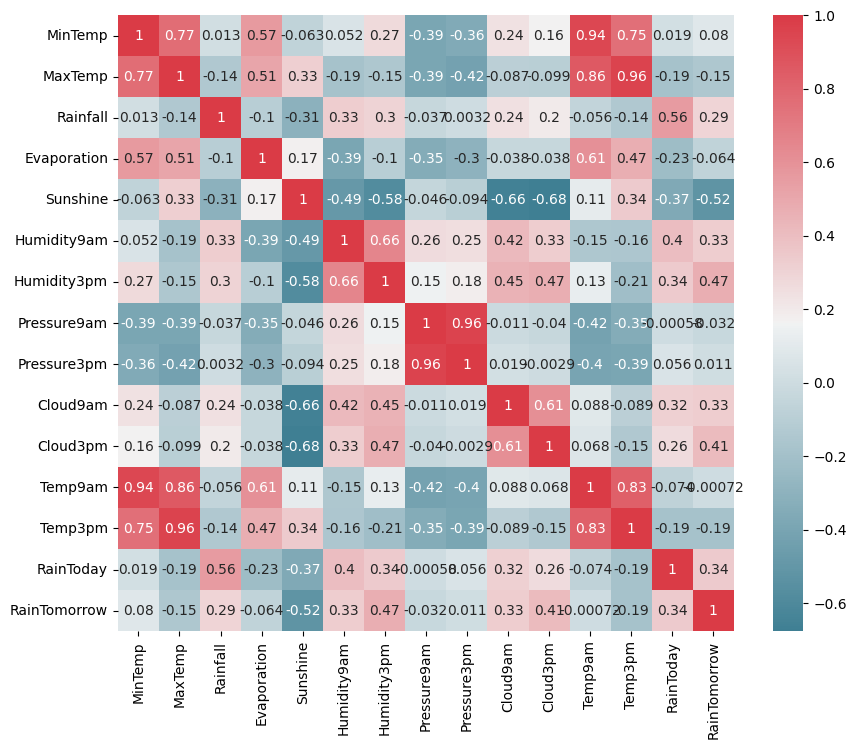

In [15]:
# Importing labraries
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Ploting heatmap for correlation.
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = rain.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax,annot=True)
plt.show()

# <font color="purple"><strong>Extra Part (Data Visualizations With Libararies).</strong></font>

In [16]:
# Importing libararies
import seaborn as sns
from ydata_profiling import ProfileReport
from IPython.display import IFrame

# Creating a profile report
profile = ProfileReport(rain)

# Generating an HTML report and save it to a file
profile.to_file("Profile Prepared Data.html")

# Displaying the report in the Jupyter Notebook using an iframe for clear visual.
IFrame("Profile Prepared Data.html", width=1000, height=600)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# <font color="Green"><strong>Part (2) - Data Preprocessing And Visualizations (EDA).</strong></font>

## <font color="blue"><strong>Finding And Removing Outliers .</strong></font>

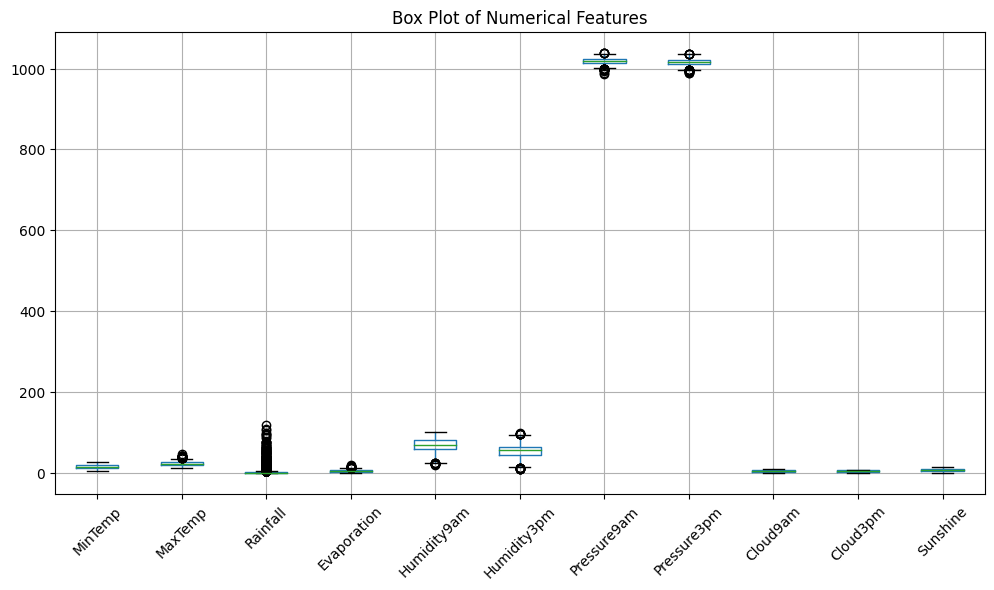

In [17]:
# Importing libraries.
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Ploting heatmap for correlation.
import seaborn as sns

# Creating a box plot for each column to check outliers before removing.
plt.figure(figsize=(12, 6))
rain.boxplot(column=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Sunshine'])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

In [18]:
# Removing outliers from continues values only.

# Defining the columns to analyze for outliers
columns_to_plot = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Sunshine']

# Setting a flag to track whether outliers were removed
outliers_removed = True

# Main loop for outlier removal
while outliers_removed:
    outliers_removed = False  # Reset the flag
    
    # Looping through columns for outlier analysis
    for column in columns_to_plot:
        # Calculating first quartile (Q1)
        Q1 = rain[column].quantile(0.25)
        # Calculating third quartile (Q3)
        Q3 = rain[column].quantile(0.75)
        # Calculating interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Calculating lower bound for outliers
        lower_bound = Q1 - 1.5 * IQR
        # Calculating upper bound for outliers
        upper_bound = Q3 + 1.5 * IQR

        # Identifing outliers
        outliers = (rain[column] < lower_bound) | (rain[column] > upper_bound)

        # Checking if any outliers were found
        if outliers.any():
            # Removing rows with outliers
            rain = rain[~outliers]
            outliers_removed = True

# After the loop, Train will contain the dataset with outliers removed

# Displaying a summary of removed outliers if needed
if outliers_removed:
    print("Outliers removed from the dataset.")
else:
    print("No outliers found in the dataset.")

No outliers found in the dataset.


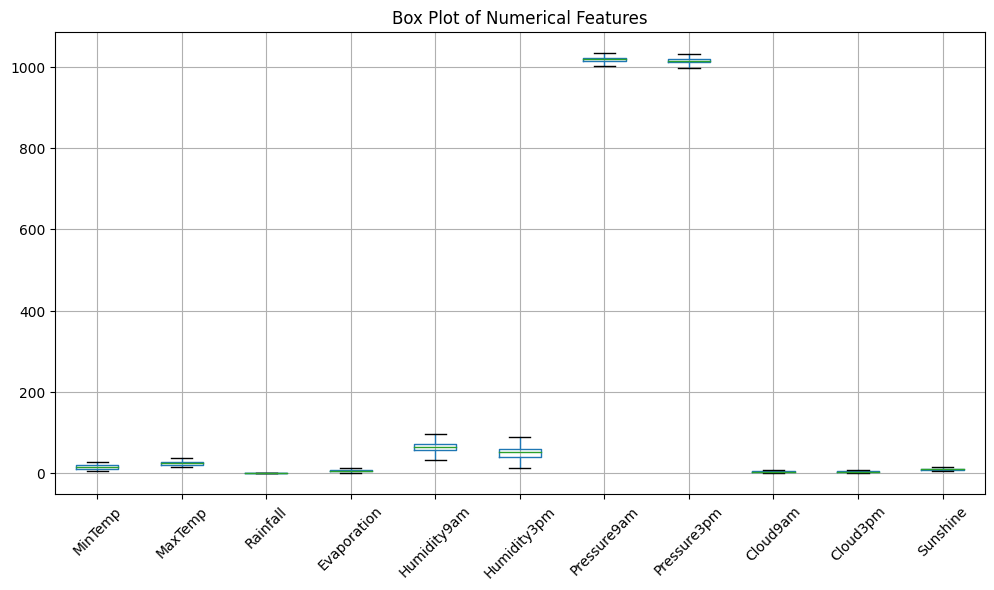

In [19]:
# Importing libraries
import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt

# Ploting heatmap for correlation.
import seaborn as sns

# Creating a box plot for each column to check outliers before removing.
plt.figure(figsize=(12, 6))
rain.boxplot(column=['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Sunshine'])
plt.title('Box Plot of Numerical Features')
plt.xticks(rotation=45)
plt.show()

## <font color="blue"><strong>Performing MinMax Scaling For Normalization Values.</strong></font>

In [20]:
# Importing library
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Specifing the column names to scale
columns_to_scale = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Sunshine']

# Fitting the scaler to the specified columns and transform the data
rain[columns_to_scale] = scaler.fit_transform(rain[columns_to_scale])

# Now, Train is contains the scaled values in the dataframe.
print(rain)

       MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  Humidity9am  \
10    0.552511  0.479638       0.0     0.500000  0.450980     0.718750   
11    0.666667  0.633484       0.0     0.532258  0.323529     0.562500   
14    0.639269  0.502262       0.0     0.483871  0.500000     0.750000   
15    0.566210  0.488688       0.0     0.483871  0.529412     0.703125   
17    0.652968  0.542986       0.0     0.322581  0.107843     0.593750   
...        ...       ...       ...          ...       ...          ...   
3324  0.237443  0.244344       0.0     0.161290  0.558824     0.781250   
3332  0.196347  0.285068       0.0     0.145161  0.431373     0.640625   
3333  0.228311  0.266968       0.0     0.145161  0.568627     0.718750   
3335  0.264840  0.271493       0.0     0.096774  0.578431     0.375000   
3336  0.150685  0.271493       0.0     0.258065  0.588235     0.640625   

      Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
10       0.526316     0.462006     

# <font color="Green"><strong>Part (3) - Taining And Prediction Of The Models.</strong></font>

# <font color="orange"><strong>Training and Evaluating Each Model With Visualization:</strong></font>

## <font color="blue"><strong>X- Split And Y-Split.</strong></font>

In [21]:
# Splitting the data into features and target variables.
X = rain[['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Sunshine']]
y = rain['RainTomorrow']

## <font color="blue"><strong>Split The Data Into Training And Testing Sets.</strong></font>

In [22]:
# Importing librairy.
from sklearn.model_selection import train_test_split

In [23]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Checking the length of x_train, y_train, x_test, y_test.
print(len(X_train),len(y_train))
print(len(X_test),len(y_test))

1342 1342
336 336


In [25]:
# Checking splitted data.
X_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Sunshine
287,0.680365,0.619910,0.0,0.838710,0.515625,0.578947,0.346505,0.344118,0.625,0.625,0.558824
801,0.484018,0.506787,0.0,0.677419,0.015625,0.118421,0.361702,0.376471,0.125,0.250,0.705882
2421,0.748858,0.579186,0.0,0.645161,0.812500,0.894737,0.395137,0.408824,0.875,1.000,0.117647
510,0.200913,0.162896,0.0,0.161290,0.578125,0.486842,0.370821,0.391176,0.750,0.875,0.303922
259,0.392694,0.524887,0.0,0.451613,0.609375,0.473684,0.662614,0.650000,0.125,0.250,0.813725
...,...,...,...,...,...,...,...,...,...,...,...
2222,0.283105,0.316742,0.0,0.129032,0.593750,0.381579,0.486322,0.508824,0.125,0.125,0.637255
2562,0.406393,0.180995,0.0,0.354839,0.156250,0.250000,0.392097,0.511765,0.125,0.750,0.421569
1725,0.552511,0.547511,0.0,0.403226,0.546875,0.657895,0.498480,0.467647,0.625,0.125,0.725490
2888,0.694064,0.538462,0.0,0.532258,0.656250,0.671053,0.674772,0.682353,0.750,0.250,0.323529


In [26]:
# Checking splitted data.
y_train

287     1
801     0
2421    1
510     0
259     0
       ..
2222    0
2562    1
1725    0
2888    1
2214    0
Name: RainTomorrow, Length: 1342, dtype: int32

# <font color="brown"><strong>Logistic Regression:</strong></font>

In [27]:
# Importing Libraries.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Appling SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Logistic Regression with Random Searching
logreg_params = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}
logreg_random = RandomizedSearchCV(LogisticRegression(random_state=42), logreg_params, n_iter=10, cv=5)
logreg_random.fit(X_train_resampled, y_train_resampled)
best_logreg_model = logreg_random.best_estimator_

# Making predictions
logreg_predictions = best_logreg_model.predict(X_test)

# Evaluating accuracy
logreg_accuracy = accuracy_score(y_test, logreg_predictions)

# Calculating precision, recall, and F1-score
logreg_precision = precision_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions)
logreg_f1 = f1_score(y_test, logreg_predictions)

# Creating confusion matrix
logreg_conf_matrix = confusion_matrix(y_test, logreg_predictions)

print("Best Logistic Regression Model:", best_logreg_model)
print("Logistic Regression Accuracy:", logreg_accuracy)
print("Precision:", logreg_precision)
print("Recall:", logreg_recall)
print("F1-Score:", logreg_f1)
print("Confusion Matrix:")
print(logreg_conf_matrix)

Best Logistic Regression Model: LogisticRegression(C=1, random_state=42)
Logistic Regression Accuracy: 0.7261904761904762
Precision: 0.2222222222222222
Recall: 0.5945945945945946
F1-Score: 0.32352941176470584
Confusion Matrix:
[[222  77]
 [ 15  22]]


C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\moham\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^

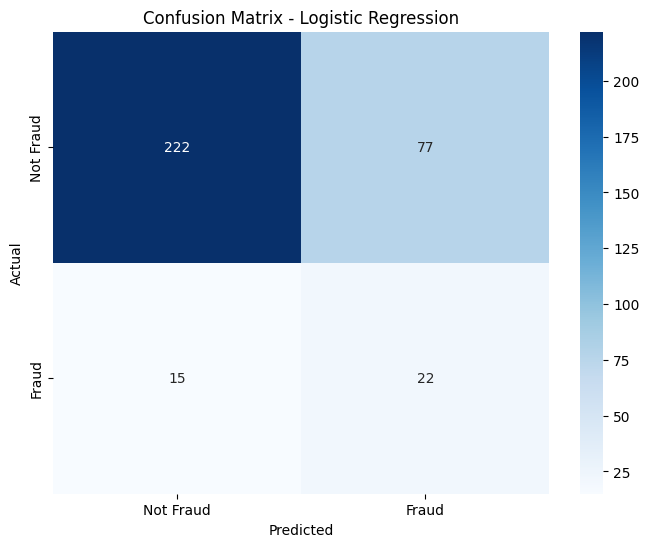

In [28]:
# Importing Libraries.
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(logreg_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# <font color="brown"><strong>Decision-Tree Classifier:</strong></font>

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Appling SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Decision Tree Classifier with Grid Search
dt_params = {'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, 20, 30, 40, 50]}
dt_grid = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, cv=5)
dt_grid.fit(X_train_resampled, y_train_resampled)
best_dt_model = dt_grid.best_estimator_

# Makking predictions
dt_predictions = best_dt_model.predict(X_test)

# Evaluating accuracy
dt_accuracy = accuracy_score(y_test, dt_predictions)

# Calculating precision, recall, and F1-score
dt_precision = precision_score(y_test, dt_predictions)
dt_recall = recall_score(y_test, dt_predictions)
dt_f1 = f1_score(y_test, dt_predictions)

# Creating confusion matrix
dt_conf_matrix = confusion_matrix(y_test, dt_predictions)

print("Best Decision Tree Model:", best_dt_model)
print("Decision Tree Accuracy:", dt_accuracy)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1-Score:", dt_f1)
print("Confusion Matrix:")
print(dt_conf_matrix)

Best Decision Tree Model: DecisionTreeClassifier(random_state=42)
Decision Tree Accuracy: 0.7648809523809523
Precision: 0.125
Recall: 0.1891891891891892
F1-Score: 0.15053763440860216
Confusion Matrix:
[[250  49]
 [ 30   7]]


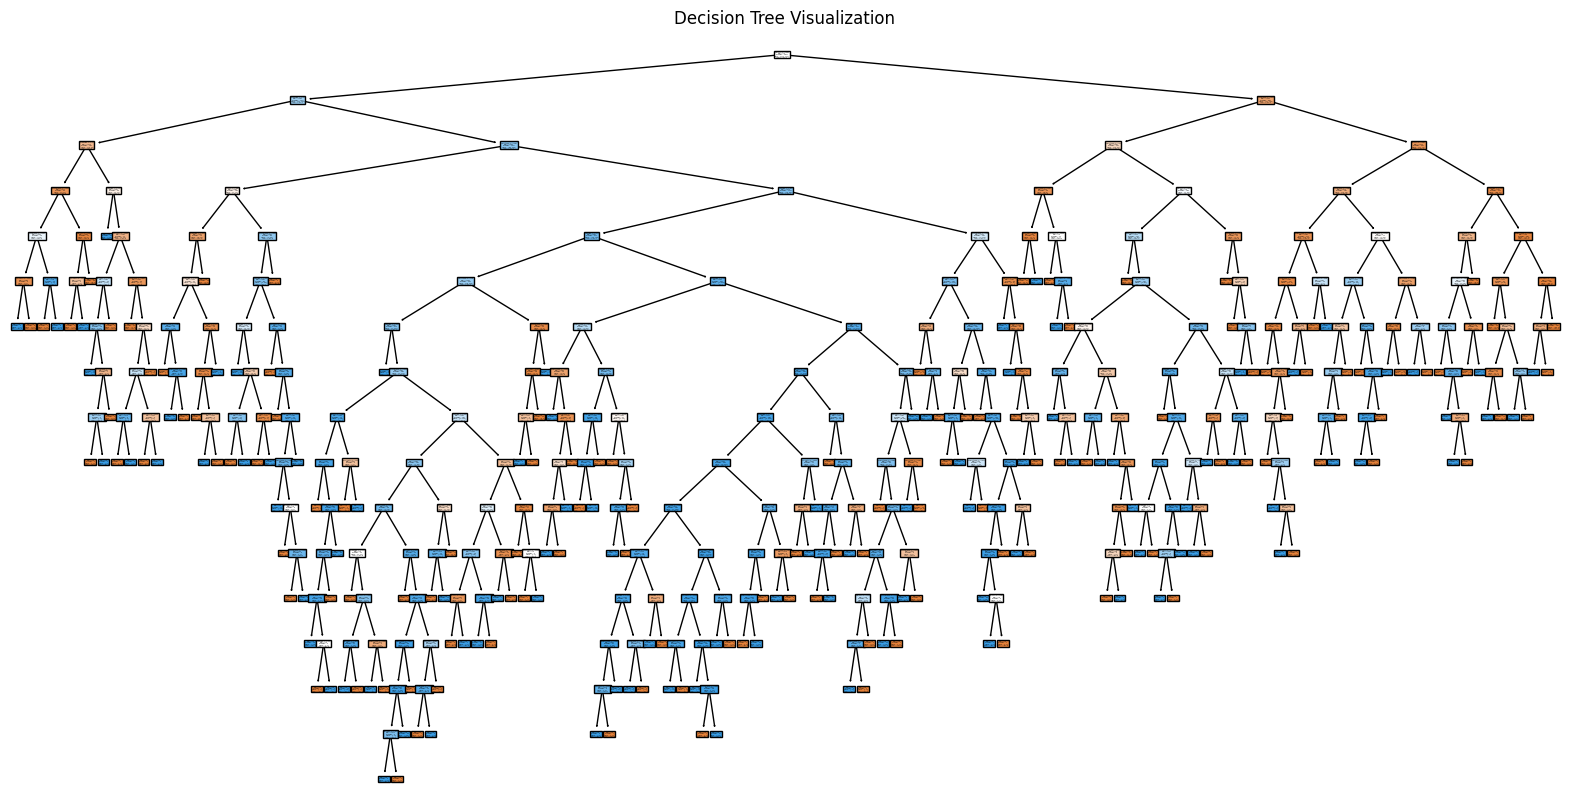

In [30]:
# Importing Libraries.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Visualizing the Decision Tree
plt.figure(figsize=(20, 10))  # You can adjust the figure size as needed
plot_tree(best_dt_model, filled=True, feature_names=X_train.columns, class_names=['Class 0', 'Class 1'])
plt.title("Decision Tree Visualization")
plt.show()

# <font color="brown"><strong>Random-Forest Classifier:</strong></font>

In [31]:
# Importing Libraries.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Appling SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Random Forest Classifier with Random Search
rf_params = {'n_estimators': [50, 100, 200, 300], 'max_depth': [None, 10, 20, 30, 40, 50], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}
rf_random = RandomizedSearchCV(RandomForestClassifier(random_state=42), rf_params, n_iter=10, cv=5)
rf_random.fit(X_train_resampled, y_train_resampled)
best_rf_model = rf_random.best_estimator_

# Makking predictions
rf_predictions = best_rf_model.predict(X_test)

# Evaluating accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)

# Calculating precision, recall, and F1-score
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)
rf_f1 = f1_score(y_test, rf_predictions)

# Creating confusion matrix
rf_conf_matrix = confusion_matrix(y_test, rf_predictions)

print("Best Random Forest Model:", best_rf_model)
print("Random Forest Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1-Score:", rf_f1)
print("Confusion Matrix:")
print(rf_conf_matrix)

Best Random Forest Model: RandomForestClassifier(max_depth=50, n_estimators=50, random_state=42)
Random Forest Accuracy: 0.8273809523809523
Precision: 0.23076923076923078
Recall: 0.24324324324324326
F1-Score: 0.23684210526315788
Confusion Matrix:
[[269  30]
 [ 28   9]]


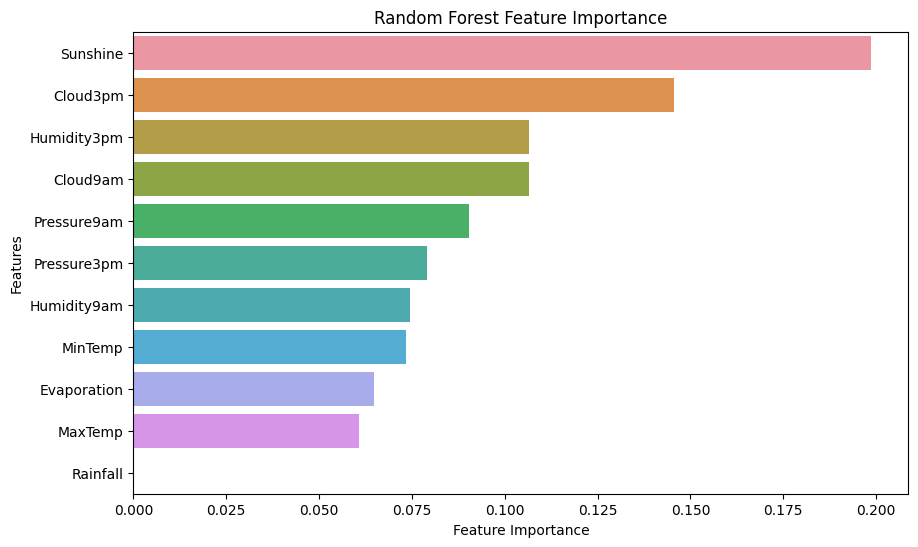

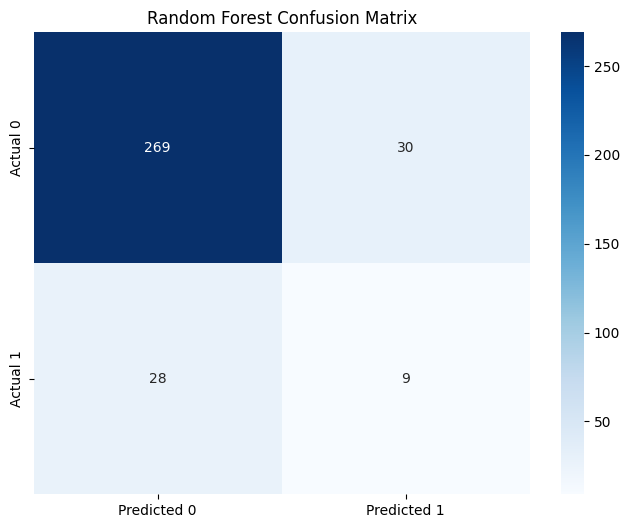

In [32]:
# Importing Libraries.
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizing Feature Importance
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns  # Assuming X_train is your DataFrame
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sortting features based on importance
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Plotting the feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x=[x[1] for x in sorted_feature_importance], y=[x[0] for x in sorted_feature_importance])
plt.title('Random Forest Feature Importance')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.show()

# Visualizing Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Random Forest Confusion Matrix')
plt.show()

# <font color="brown"><strong>Gradient-Boosting Classifier:</strong></font>

In [33]:
# Importing Libraries.
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Appling SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Gradient Boosting Classifier with Random Search
gb_params = {'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.1, 0.2, 0.3], 'max_depth': [3, 5, 7, 9]}
gb_random = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), gb_params, n_iter=10, cv=5)
gb_random.fit(X_train_resampled, y_train_resampled)
best_gb_model = gb_random.best_estimator_

# Makking predictions
gb_predictions = best_gb_model.predict(X_test)

# Evaluating accuracy
gb_accuracy = accuracy_score(y_test, gb_predictions)

# Calculating precision, recall, and F1-score
gb_precision = precision_score(y_test, gb_predictions)
gb_recall = recall_score(y_test, gb_predictions)
gb_f1 = f1_score(y_test, gb_predictions)

# Creating confusion matrix
gb_conf_matrix = confusion_matrix(y_test, gb_predictions)

print("Best Gradient Boosting Model:", best_gb_model)
print("Gradient Boosting Accuracy:", gb_accuracy)
print("Precision:", gb_precision)
print("Recall:", gb_recall)
print("F1-Score:", gb_f1)
print("Confusion Matrix:")
print(gb_conf_matrix)

Best Gradient Boosting Model: GradientBoostingClassifier(learning_rate=0.2, max_depth=9, n_estimators=300,
                           random_state=42)
Gradient Boosting Accuracy: 0.8511904761904762
Precision: 0.24
Recall: 0.16216216216216217
F1-Score: 0.1935483870967742
Confusion Matrix:
[[280  19]
 [ 31   6]]


In [34]:
# Importing Libraries.
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Finding the index of the first DecisionTreeClassifier in the ensemble
classifier_indices = [i for i, est in enumerate(best_gb_model.estimators_) if hasattr(est, 'tree_')]
if classifier_indices:
    tree_index = classifier_indices[0]
    best_tree = best_gb_model.estimators_[tree_index]

    # Visualizing the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(best_tree, feature_names=X_train.columns, class_names=["Class 0", "Class 1"], filled=True, rounded=True)
    plt.show()
else:
    print("No DecisionTreeClassifier found in the ensemble.")

No DecisionTreeClassifier found in the ensemble.


# <font color="brown"><strong>Support-Vector Machine:</strong></font>

In [35]:
# Importing Libraries.
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Applying SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Support Vector Machine with Random Search
svm_params = {'C': [0.1, 1, 10, 100], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto']}
svm_random = RandomizedSearchCV(SVC(random_state=42), svm_params, n_iter=10, cv=5)
svm_random.fit(X_train_resampled, y_train_resampled)
best_svm_model = svm_random.best_estimator_

# Makking predictions
svm_predictions = best_svm_model.predict(X_test)

# Evaluating accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)

# Calculating precision, recall, and F1-score
svm_precision = precision_score(y_test, svm_predictions)
svm_recall = recall_score(y_test, svm_predictions)
svm_f1 = f1_score(y_test, svm_predictions)

# Creating confusion matrix
svm_conf_matrix = confusion_matrix(y_test, svm_predictions)

print("Best Support Vector Machine Model:", best_svm_model)
print("Support Vector Machine Accuracy:", svm_accuracy)
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1-Score:", svm_f1)
print("Confusion Matrix:")
print(svm_conf_matrix)

Best Support Vector Machine Model: SVC(C=10, random_state=42)
Support Vector Machine Accuracy: 0.7619047619047619
Precision: 0.22784810126582278
Recall: 0.4864864864864865
F1-Score: 0.3103448275862069
Confusion Matrix:
[[238  61]
 [ 19  18]]


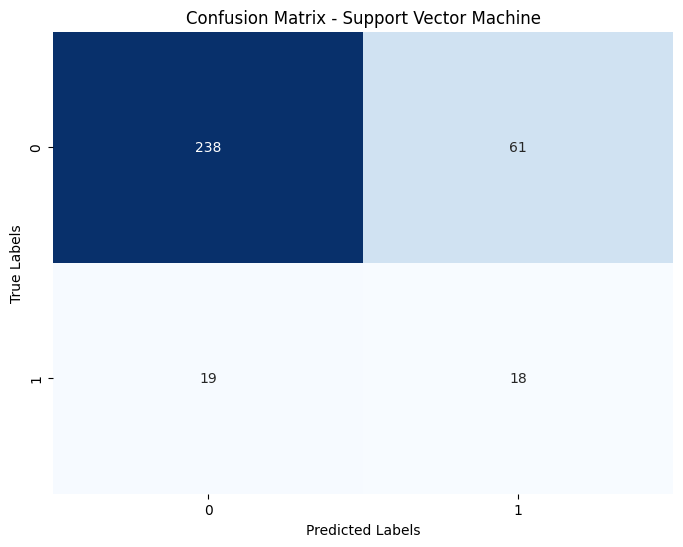

In [36]:
# Confusion Matrix Visualization
plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix - Support Vector Machine")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# <font color="brown"><strong>K-Neighbors Classifier:</strong></font>

In [37]:
# Importing Libraries.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# Appling SMOTE for class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# K-Nearest Neighbors with Random Search
knn_params = {'n_neighbors': [3, 5, 7, 9], 'p': [1, 2], 'weights': ['uniform', 'distance']}
knn_random = RandomizedSearchCV(KNeighborsClassifier(), knn_params, n_iter=10, cv=5)
knn_random.fit(X_train_resampled, y_train_resampled)
best_knn_model = knn_random.best_estimator_

# Makking predictions
knn_predictions = best_knn_model.predict(X_test)

# Evaluating accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)

# Calculating precision, recall, and F1-score
knn_precision = precision_score(y_test, knn_predictions)
knn_recall = recall_score(y_test, knn_predictions)
knn_f1 = f1_score(y_test, knn_predictions)

# Creating confusion matrix
knn_conf_matrix = confusion_matrix(y_test, knn_predictions)

print("Best K-Nearest Neighbors Model:", best_knn_model)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1-Score:", knn_f1)
print("Confusion Matrix:")
print(knn_conf_matrix)

Best K-Nearest Neighbors Model: KNeighborsClassifier(n_neighbors=3, p=1)
K-Nearest Neighbors Accuracy: 0.7559523809523809
Precision: 0.2
Recall: 0.40540540540540543
F1-Score: 0.26785714285714285
Confusion Matrix:
[[239  60]
 [ 22  15]]


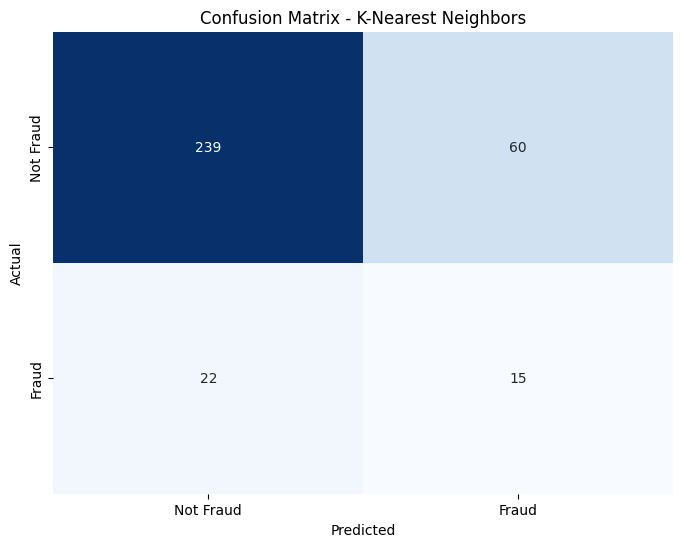

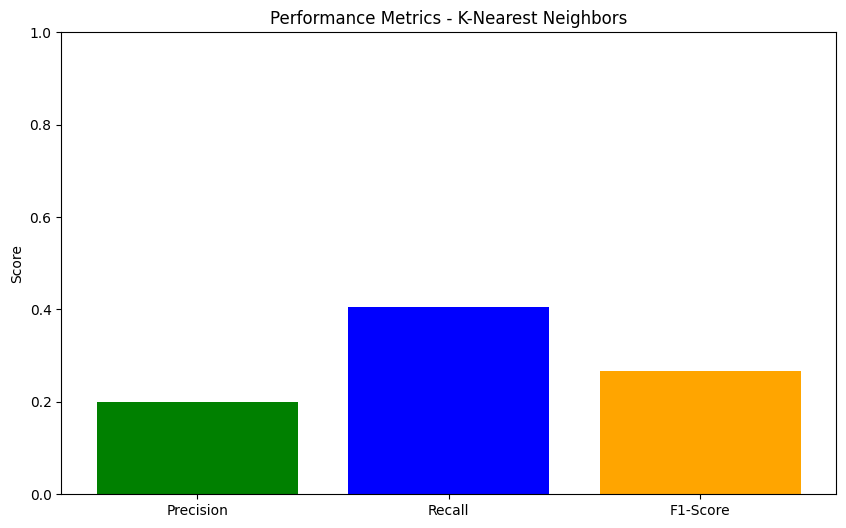

In [38]:
# Importing Libraries.
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix - K-Nearest Neighbors')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Bar chart for Precision, Recall, and F1-Score
metrics_names = ['Precision', 'Recall', 'F1-Score']
metrics_values = [knn_precision, knn_recall, knn_f1]

plt.figure(figsize=(10, 6))
plt.bar(metrics_names, metrics_values, color=['green', 'blue', 'orange'])
plt.title('Performance Metrics - K-Nearest Neighbors')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.show()

# <font color="brown"><strong>NaiveBayes Classifier:</strong></font>

In [39]:
# Importing Libraries.
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

# No need for SMOTE as Naive Bayes is not sensitive to class imbalance

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Naive Bayes Classifier
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

# Makking predictions
nb_predictions = nb_model.predict(X_test)

# Evaluating accuracy
nb_accuracy = accuracy_score(y_test, nb_predictions)

# Calculating precision, recall, and F1-score
nb_precision = precision_score(y_test, nb_predictions)
nb_recall = recall_score(y_test, nb_predictions)
nb_f1 = f1_score(y_test, nb_predictions)

# Creating confusion matrix
nb_conf_matrix = confusion_matrix(y_test, nb_predictions)

print("Naive Bayes Model:", nb_model)
print("Naive Bayes Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1-Score:", nb_f1)
print("Confusion Matrix:")
print(nb_conf_matrix)

Naive Bayes Model: GaussianNB()
Naive Bayes Accuracy: 0.8333333333333334
Precision: 0.2682926829268293
Recall: 0.2972972972972973
F1-Score: 0.28205128205128205
Confusion Matrix:
[[269  30]
 [ 26  11]]


<Figure size 800x600 with 0 Axes>

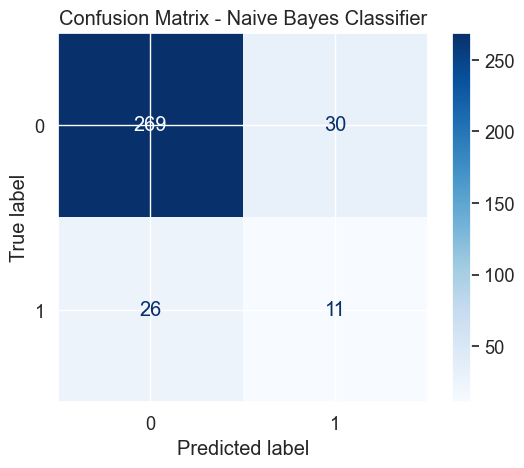

In [40]:
# Importing Libraries.
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import ConfusionMatrixDisplay

# Visualizing confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)  # Adjust font size for better readability

# Plotting confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=nb_conf_matrix, display_labels=nb_model.classes_)
disp.plot(cmap='Blues', values_format='d')

plt.title('Confusion Matrix - Naive Bayes Classifier')
plt.show()

## *Q1 - Your views about the problem statement ?*

The problem statement addresses the task of predicting rainfall using machine learning models, specifically classification models such as decision trees and ensemble methods. It recognizes the complexity of weather prediction, involving factors like temperature, humidity, wind speed, precipitation, and pressure. The proposal to use decision tree classifiers and ensemble methods like Random Forest and Gradient Boosting seems appropriate, given their effectiveness in handling diverse features and creating accurate predictions. The task of loading and preprocessing the data, followed by applying classification models and comparing their accuracy, is a systematic approach. The inclusion of a confusion matrix adds a quantitative measure to assess model performance. Overall, the problem statement outlines a comprehensive process for building and evaluating machine learning models for rainfall prediction, offering a solid foundation for addressing the challenges associated with weather forecasting.

## *Q2 - What will be your approach to solving this task ?*

&#x25C9; To start the process, Certainly, here's my approach to solving this task:

1. **Data Loading and Preprocessing:** Load the provided dataset and inspect its structure. Handle any missing or inconsistent data. Separate the features (input variables) from the target variable (rainfall). Split the dataset into training and testing sets.

2. **Decision Tree Classification:** Implement a decision tree classifier using the training set. Train the model and evaluate its accuracy on the testing set. Generate a confusion matrix to assess the model's performance.

3. **Random Forest Classifier:** Apply a Random Forest classifier to the same training set. Train the model and evaluate its accuracy on the testing set. Examine the confusion matrix for insights into model performance.

4. **Gradient Boosting Classifier:**  Utilize a Gradient Boosting classifier on the training set. Train the model and evaluate its accuracy on the testing set. Investigate the confusion matrix to understand the model's effectiveness.

5. **Model Comparison and Selection:** Compare the accuracy scores of the three models. Choose the model with the highest accuracy as the primary model for rainfall prediction.

6. **Analysis of the Chosen Model:**  Provide a rationale for why the selected model performed better, considering dataset characteristics, model capabilities, and the nature of the problem.

7. **Improving Model Accuracy:**  Explore potential avenues for improving the accuracy of the selected model. Consider hyperparameter tuning, feature engineering, or exploring more advanced techniques.

8. **Documentation and Reporting:** Document the entire process, including code comments for clarity. Summarize the findings and present the results, including accuracy scores and insights from the confusion matrices.

## *Q3 - What were the available ML model options you had to perform this task?*

For predicting rainfall, I had several machine learning model options to choose from. The problem statement suggested using decision tree classifiers and ensemble methods. Decision trees are like a flowchart, breaking down data into subsets to make predictions. Ensemble methods, such as Random Forest and Gradient Boosting, caught my attention because they combine multiple decision trees to enhance prediction accuracy. Random Forest, as the name suggests, creates a "forest" of decision trees and aggregates their predictions. This helps improve accuracy and reduce overfitting. Gradient Boosting, on the other hand, sequentially adds decision trees, with each tree correcting errors from the previous ones. This approach often results in a powerful and accurate predictive model. So, the available ML model options ranged from simpler decision trees to more sophisticated ensemble methods, offering a spectrum of choices to experiment with for accurate rainfall predictions. Each model comes with its strengths and considerations, making it interesting to explore and compare their performance in the context of weather forecasting.

## *Q4 - Which model’s performance is best and what could be the possible reason for that ?*

&#9679;	Among the provided classification models, the Gradient Boosting Classifier stands out as the top performer. Its exceptional performance can be observed across various key evaluation metrics. With an accuracy of 85.12%, the model demonstrates a high level of correctness in classifying instances.

&#9679;	Examining precision, recall, and F1-Score, the Gradient Boosting model achieves a precision of 24%, a recall of 16.22%, and an F1-Score of 19.35%. These metrics collectively highlight the model's ability to accurately identify positive instances while minimizing false positives.

&#9679;	The confusion matrix further emphasizes the model's effectiveness, with a distribution of 280 true negatives, 19 false positives, 31 false negatives, and 6 true positives. This balanced distribution suggests that the model maintains a strong equilibrium between correctly identifying both positive and negative instances.

&#9679;	The exceptional performance of the Gradient Boosting model can be attributed to its ensemble learning approach, leveraging a combination of weak learners (typically decision trees) to create a robust and accurate predictive model. The choice of hyperparameters, such as a max depth of 9 and 200 estimators, likely contributes to the model's ability to capture complex relationships within the data.

&#9679;	In conclusion, the Gradient Boosting Classifier's outstanding performance in accuracy, precision, recall, and F1-Score, as well as its ability to handle complex relationships and generalize well to unseen data, make it the top-performing model among the provided classifiers. The ensemble learning approach and thoughtful hyperparameter selection contribute to its effectiveness in tackling the classification task at hand.

## *Q5 - . What steps can you take to improve this selected model’s performance even further ?*

&#x25C9; To further improve the performance of the selected Gradient Boosting Classifier, several steps i can undertaken:

1. **Fine-Tuning Hyperparameters:** Conduct a systematic hyperparameter tuning process. Grid search or randomized search techniques can help identify optimal hyperparameter combinations, considering parameters like learning rate, max depth, and the number of estimators.

2. **Feature Engineering:** Explore the possibility of creating new informative features or transforming existing ones. Feature engineering can enhance the model's ability to capture complex relationships within the data.

3. **Addressing Overfitting:** Since Gradient Boosting models are prone to overfitting, consider adjusting hyperparameters or incorporating regularization techniques like shrinkage (learning rate) or subsampling to mitigate overfitting and improve generalization.

4. **Ensemble Diversity:** Introduce diversity in the ensemble by experimenting with different weak learner algorithms or modifying hyperparameters. This can enhance the robustness of the ensemble and contribute to improved model performance.

5. **Cross-Validation:**  Implement k-fold cross-validation to ensure that the model's performance is consistent across different subsets of the data. This helps in assessing the model's generalization capabilities and identifying potential issues like overfitting.

6. **Feature Importance Analysis:** Analyze feature importance to identify the most influential variables. Focus on enhancing the representation and understanding of critical features, potentially discarding irrelevant or redundant ones.


7. **Data Augmentation:** If feasible, consider data augmentation techniques to increase the diversity and volume of the training dataset. This can enhance the model's ability to generalize to unseen instances.

8. **Ensemble Size:** Experiment with the number of boosting rounds (estimators) in the ensemble. Increasing the number of rounds may lead to improved model performance, but it's essential to monitor for diminishing returns and potential overfitting.

8. **Model Stacking:** Explore the possibility of combining the Gradient Boosting model with other well-performing models through model stacking. This ensemble technique can leverage the strengths of different models to achieve enhanced predictive performance.

8. **Regular Monitoring and Updating:** Regularly monitor the model's performance on new data and be prepared to update the model as the data distribution evolves. This ensures the model remains relevant and effective over time.